### **SOLAR PHARMACY: Predicting Volume of Sales**

![pic](pharmacy_pic.jpg)
<a href='https://www.freepik.com/free-photos-vectors/business'>Business vector created by upklyak - www.freepik.com</a>

## About Solar

Solar is a pharmacies chain that operates with more than 3,000 establishments in 7 countries. Currently, the managers of each Solar pharmacy are tasked with forecasting their daily sales up to six weeks in advance. In-store sales are influenced by several factors, including promotions, competitors, school and state holidays, seasonality and location. With thousands of managers predicting sales based on their unique circumstances, the accuracy of the results can vary widely.

## About data

Dataset is a part of Data Science Academy Competition and can be checked on the following link:

https://www.kaggle.com/c/competicao-dsa-machine-learning-mar-2019

**DATA DICTIONARY**

``ID`` - Represents a tuple (Store, Date)<br>
``Store`` - Unique ID for each store<br>
``DayOfWeek`` - Number day of the week<br>
``Sales`` - Amount of sales for a given day *(target)*<br>
``Customers`` - Number of clients for a given day<br>
``Open`` - Indicates whether a store is opened (1) or closed (0) for a given day.<br>
``StateHoliday`` - Indicates a State Holiday. a = pulic holiday, b = Easter, c = Christmas , 0 = no holiday<br>
``SchoolHoliday`` - Indicates whether a (Store, Date) was affected by the closure of public school<br>
``StoreType`` - There are 4 models of differents stores: a, b, c, d<br>
``Assortment`` - Describes a level: a = basic, b = extra, c = extended<br>
``CompetitionDistance`` - Distance in meters to the nearest competing store<br>
``CompetitionOpenSince[Month/Year]`` - Indicates the approximated year and month of the hour when the nearest competitor was opened<br>
``Promo`` - indicates whether a store is running a promotion on that day<br>
``Promo2`` - Continuous and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating<br>
``Promo2Since[Year/Week]`` - describes the calendar year and week in which the store started participating in Promo2<br>
``PromoInterval`` - describes the consecutive intervals that Promo2 starts, indicating the months in which the promotion starts again. For example. "Feb, May, Aug, Nov" means that each round starts in February, May, August, November of any year for that store.

## Package Importing and Data Uploading

In [1]:
# Bases
import pandas as pd 
import numpy as np 

# Visualization
from matplotlib import pyplot as plt
import seaborn as sns

# Machine Learning modeling and metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import r2_score, mean_absolute_error
# Configuration
%matplotlib inline
pd.set_option('display.max_columns', None)

In [4]:
# Datas

PATH_TRAIN_FILE = '~/Mega/Portfolio/dataset/regression/dataset_solar_TRAIN.csv'
PATH_STORES_FILE = '~/Mega/Portfolio/dataset/regression/dataset_solar_STORES.csv'


data_train = pd.read_csv(PATH_TRAIN_FILE, low_memory=False, parse_dates=['Date'])
data_stores = pd.read_csv(PATH_STORES_FILE)

# Merge of data_train and data_stores
solar = data_train.merge(data_stores, on = 'Store')

In [3]:
# Data Checking
solar.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


## Exploratory Data Analysis

Once we've been uploaded the data, we proceed with exploratory data analysis. Here we'll find some informations about what the data has hidden inside itself and some graph visualizations.

In [68]:
# Columns unique values
solar.nunique()

Store                         1115
DayOfWeek                        7
Date                           942
Sales                        21734
Customers                     4086
Open                             2
Promo                            2
StateHoliday                     4
SchoolHoliday                    2
StoreType                        4
Assortment                       3
CompetitionDistance            654
CompetitionOpenSinceMonth       12
CompetitionOpenSinceYear        23
Promo2                           2
Promo2SinceWeek                 24
Promo2SinceYear                  7
PromoInterval                    3
dtype: int64

In [8]:
# Data info
solar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1014567 no

In [9]:
# % of Missing Value 
solar.isna().mean().sort_values(ascending=False) * 100

PromoInterval                49.943620
Promo2SinceWeek              49.943620
Promo2SinceYear              49.943620
CompetitionOpenSinceYear     31.787764
CompetitionOpenSinceMonth    31.787764
CompetitionDistance           0.259730
Open                          0.000000
DayOfWeek                     0.000000
Date                          0.000000
Sales                         0.000000
Customers                     0.000000
SchoolHoliday                 0.000000
Promo                         0.000000
StateHoliday                  0.000000
StoreType                     0.000000
Assortment                    0.000000
Promo2                        0.000000
Store                         0.000000
dtype: float64

**NOTE**: 
* Features under value 25 are all **categorical**. Counting on ``Data`` feature granularity (soon), we go up to 52 due to ``Week Of Year`` feature. Upper that we have **numerical** features.
* Presence of **missing values** (NaN). Some ``Promo`` features has 50% of NaN. This high % means there was no promotionals ava 

### Data feature slicing by its granularity

Here we slice ``Data`` into Month, Year, Week of Year, Day and others features due to better analysis.

In [4]:
## Slice of Data variable

# Numericals
solar['Month'] = solar['Date'].apply(lambda dt: dt.month)
solar['Year'] = solar['Date'].apply(lambda dt: dt.year)
solar['WeekOfYear'] = solar['Date'].apply(lambda dt: dt.weekofyear)
solar['Day'] = solar['Date'].apply(lambda dt: dt.day)

# Booleans (True / False)
solar['isMonthEnd'] = solar['Date'].apply(lambda dt: dt.is_month_end)
solar['isMonthStart'] = solar['Date'].apply(lambda dt: dt.is_month_start)
solar['isQuarterEnd'] = solar['Date'].apply(lambda dt: dt.is_quarter_end )
solar['isQuarterStart'] = solar['Date'].apply(lambda dt: dt.is_quarter_start)
solar['isYearEnd'] = solar['Date'].apply(lambda dt: dt.is_year_end)
solar['isYearStart'] = solar['Date'].apply(lambda dt: dt.is_year_start)

### Data Viz

**SCATTER PLOT**

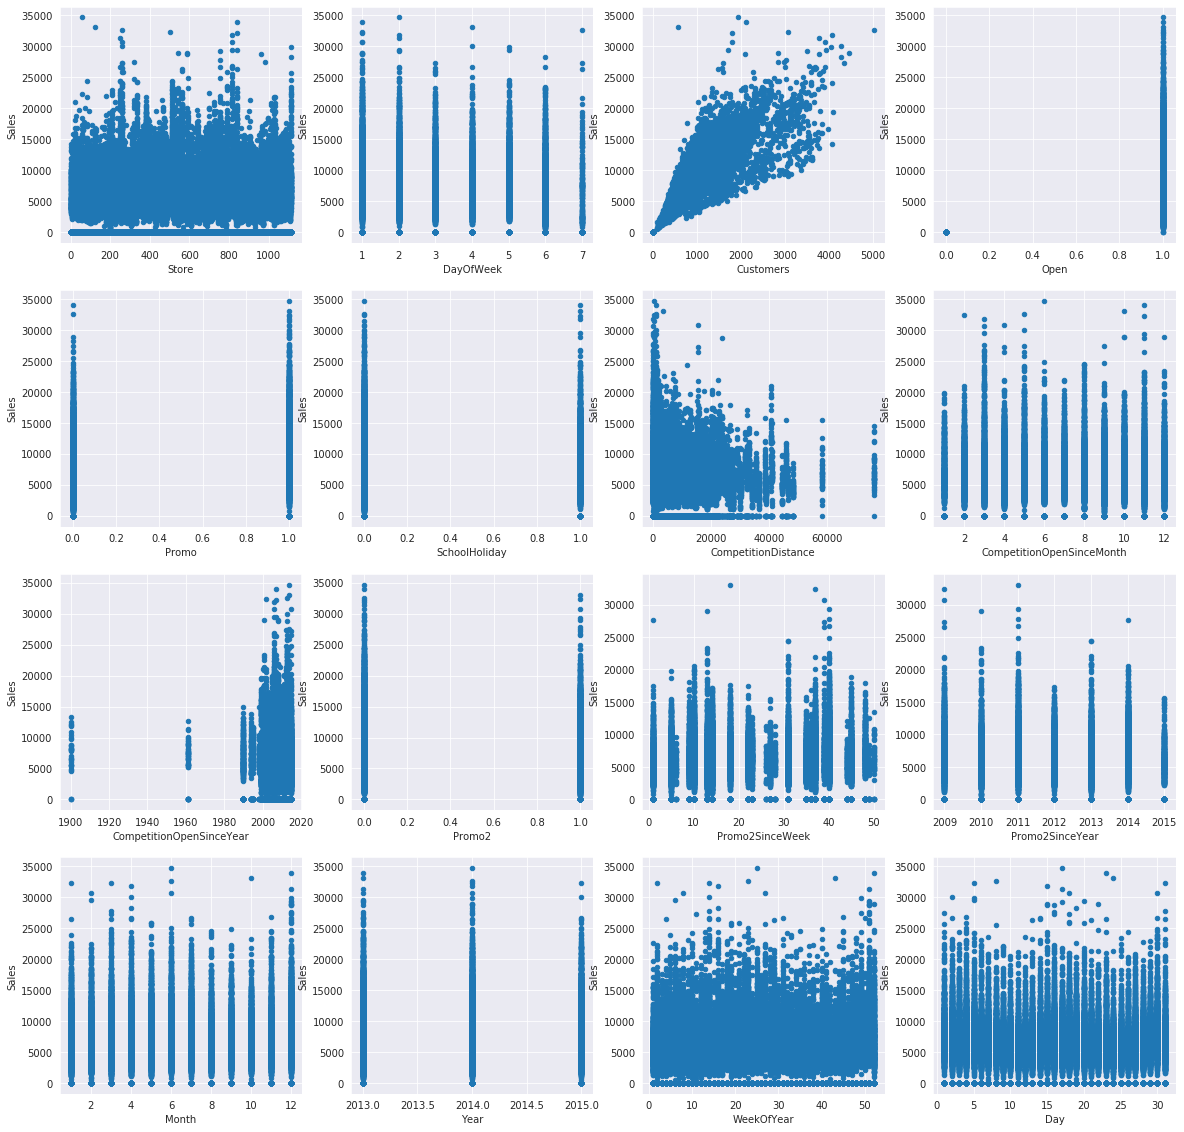

In [195]:
# ScatterPlot of numerical variables

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20));
graph_data_sample = graph.sample(frac=0.05)

for idx, feature in enumerate(features):
    graph_data_sample.plot(feature, "Sales", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4])

As we can see, there is no correlation between Sales and others features, but there is some behaviour like when we see by Customers. The more customers a store has, the more sales are made? No! This can help, for sure, if all of them buy.

**HISTOGRAM**

In [183]:
# Features for general graph analysis
features = [x for x in solar.columns.drop('Sales') if solar[x].dtype == np.float64 or solar[x].dtype == np.int64]

# Numerical and Categorical features
numerical_features = solar[features]
categorical_features = solar.drop(columns=features)

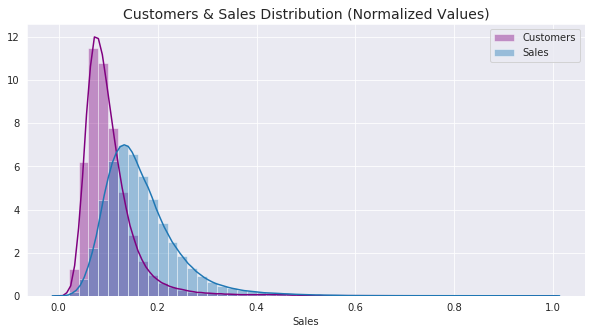

In [406]:
plt.figure(figsize=(10, 5))

CUSTOMERS = solar.Customers[solar.Sales > 0]
CUSTOMERS =(customers - customers.min()) / (customers.max() - customers.min())

SALES = solar.Sales[solar.Sales > 0]
SALES = (sales - sales.min()) / (sales.max() - sales.min())

sns.distplot(CUSTOMERS, color='purple', label='Customers')
sns.distplot(SALES, label='Sales')
plt.title('Customers & Sales Distribution (Normalized Values)', fontsize=14)
plt.legend()
plt.show()

**TIME SERIES LINE PLOT**

/home/paulo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
/home/paulo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
/home/paulo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]


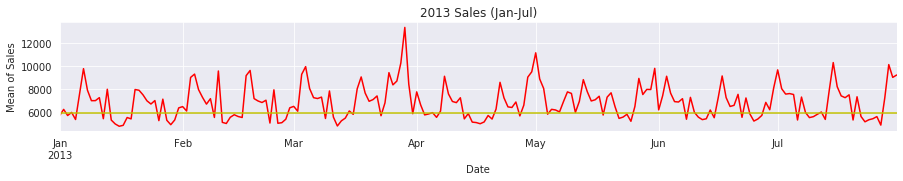

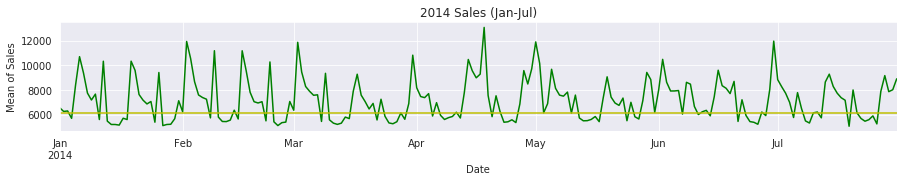

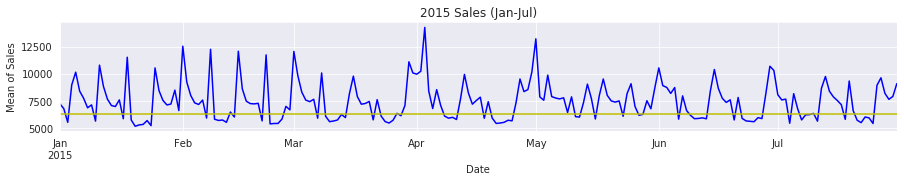

Mean of Sales in 2013 (Jan-Jul) 5973.48
Mean of Sales in 2014 (Jan-Jul) 6135.01
Mean of Sales in 2015 (Jan-Jul) 6331.25


In [410]:
###################################################

# Filters (Jan-Jul)

SLICE_2013 = (solar.Sales > 0) & (solar.Year == 2013) & (solar.Month <= 7 )
SLICE_2014 = (solar.Sales > 0) & (solar.Year == 2014) & (solar.Month <= 7 )
SLICE_2015 = (solar.Sales > 0) & (solar.Year == 2015) & (solar.Month <= 7 )

# Mean of Sales (Jan-Jul)

SALES_MEAN_2013 = round(solar_cut[SLICE_2013]['Sales'].mean(),2)
SALES_MEAN_2014 = round(solar_cut[SLICE_2014]['Sales'].mean(),2)
SALES_MEAN_2015 = round(solar_cut[SLICE_2015]['Sales'].mean(),2)

####################################################

# 2013 Sales (Jan-Jul)

solar[SLICE_2013].groupby('Date')['Sales'].mean().plot(figsize=(15,2), c='r')
plt.axhline(SALES_MEAN_2013, c='y')
plt.title('2013 Sales (Jan-Jul)')
plt.ylabel('Mean of Sales')
plt.show()

# 2014 Sales (Jan-Jul)

solar[SLICE_2014].groupby('Date')['Sales'].mean().plot(figsize=(15,2), c='g')
plt.axhline(SALES_MEAN_2014, c='y')
plt.title('2014 Sales (Jan-Jul)')
plt.ylabel('Mean of Sales')
plt.show()

# 2015 Sales (Jan-Jul)

solar[SLICE_2015].groupby('Date')['Sales'].mean().plot(figsize=(15,2),c='b')
plt.axhline(SALES_MEAN_2015, c='y')
plt.title('2015 Sales (Jan-Jul)')
plt.ylabel('Mean of Sales')
plt.show()

print('Mean of Sales in 2013 (Jan-Jul)', SALES_MEAN_2013)
print('Mean of Sales in 2014 (Jan-Jul)', SALES_MEAN_2014)
print('Mean of Sales in 2015 (Jan-Jul)', SALES_MEAN_2015)

A filter was applied due to 2015 collected data ends on July, so we can compare this period of time. The total mean during this period seems similar with some difference along months but growing over time.

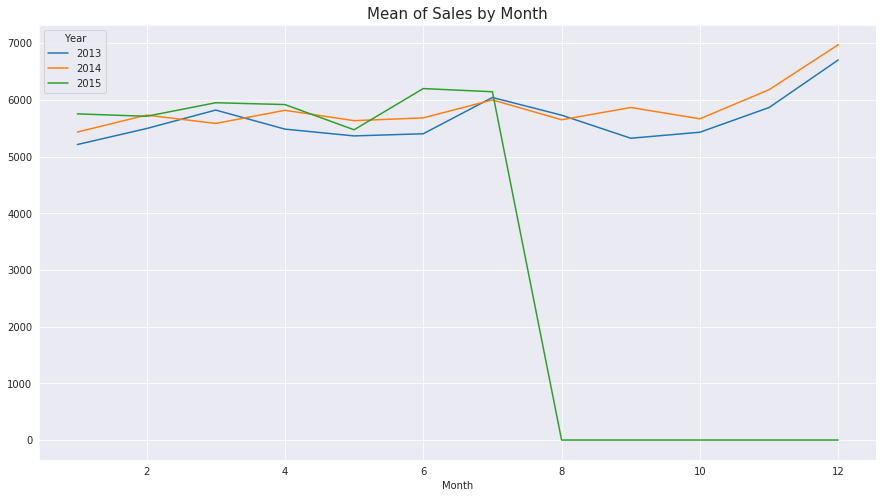

In [411]:
solar_pivot = solar.pivot_table(values='Sales', index='Month', columns='Year', aggfunc='mean').fillna(0).round()
solar_pivot.plot(figsize=(15,8))
plt.title('Mean of Sales by Month', fontsize=15)
plt.show()

And here we can see Sales Mean by Month according to each Year. Note that sales ends on July 2015 (green line goes zero).

**BARPLOTS**

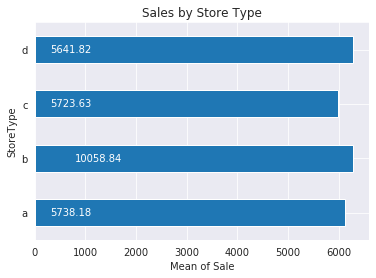

In [413]:
# Store Type Sales Mean

store_type_a_mean = solar.Sales[solar.StoreType=='a'].mean()
store_type_b_mean = solar.Sales[solar.StoreType=='b'].mean()
store_type_c_mean = solar.Sales[solar.StoreType=='c'].mean()
store_type_d_mean = solar.Sales[solar.StoreType=='d'].mean()

solar_cut.groupby('StoreType')['Sales'].mean().plot(kind='barh')
plt.title('Sales by Store Type')
plt.xlabel('Mean of Sale')
plt.annotate(
    round(store_type_a_mean,2),  # label escrita
    xy=((round(store_type_a_mean,2)/8), -0.05), ha='center', color='w')
plt.annotate(
    round(store_type_b_mean,2),  # label escrita
    xy=((round(store_type_b_mean,2)/8), 0.95), ha='center', color='w')
plt.annotate(
    round(store_type_c_mean,2),  # label escrita
    xy=((round(store_type_c_mean,2)/8), 1.95), ha='center', color='w')
plt.annotate(
    round(store_type_d_mean,2),  # label escrita
    xy=((round(store_type_d_mean,2)/8), 2.95), ha='center', color='w')
plt.show()


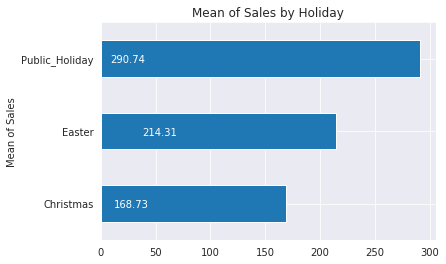

In [414]:
# Holidays Mapping

solar['StateHoliday'] = solar['StateHoliday'].replace({0:'0'})
holidays = {'0': 'Non_Holiday', 'a': 'Public_Holiday', 'b': 'Easter', 'c':'Christmas'}

solar.StateHoliday = solar.StateHoliday.map(holidays)

crhistmas_mean = solar.Sales[solar.StateHoliday=='Christmas'].mean()
easter_mean = solar.Sales[solar.StateHoliday=='Easter'].mean()
public_mean = solar.Sales[solar.StateHoliday=='Public_Holiday'].mean()

holiday_filter_mean = solar[solar.StateHoliday != 'Non_Holiday'].groupby('StateHoliday')['Sales'].mean()

# Holiday Sales Mean Comparasion

holiday_filter_mean.plot(kind='barh').plot()
plt.ylabel('Mean of Sales')
plt.title('Mean of Sales by Holiday')
plt.annotate(
    round(crhistmas_mean,2),  # label escrita
    xy=((round(crhistmas_mean,2)/6), -0.05), ha='center', color='w')
plt.annotate(
    round(easter_mean,2),  # label escrita
    xy=((round(easter_mean,2)/4), 0.95), ha='center', color='w')
plt.annotate(
    round(public_mean,2),  # label escrita
    xy=((round(public_mean,2)/12), 1.95), ha='center', color='w')
plt.show()

## Data Manipulation

In [415]:
# Distance by Store Type
print('There are NaN on Distances by Store Type A:', solar.CompetitionDistance[solar.StoreType=='a'].isna().any())
print('There are NaN on Distances by Store Type B:', solar.CompetitionDistance[solar.StoreType=='b'].isna().any())
print('There are NaN on Distances by Store Type C:', solar.CompetitionDistance[solar.StoreType=='c'].isna().any())
print('There are NaN on Distances by Store Type D:', solar.CompetitionDistance[solar.StoreType=='d'].isna().any())

There are NaN on Distances by Store Type A: True
There are NaN on Distances by Store Type B: False
There are NaN on Distances by Store Type C: False
There are NaN on Distances by Store Type D: True


In [416]:
# Median of store types distances

Dist_Type_A = solar.CompetitionDistance[solar.StoreType=='a']
Dist_Type_D = solar.CompetitionDistance[solar.StoreType=='d']

# Median printing

print('Mean Distance by Store Type A:', round(Dist_Type_A.median()))
print('Mean Distance by Store Type D:', round(Dist_Type_D.median()))

Mean Distance by Store Type A: 1790
Mean Distance by Store Type D: 5070


In [417]:
# CompetitionOpenMonth
print('There are NaN on CompetitionMonth by Store Type A:', solar.CompetitionOpenSinceMonth[solar.StoreType=='a'].isna().any())
print('There are NaN on CompetitionMonth by Store Type B:', solar.CompetitionOpenSinceMonth[solar.StoreType=='b'].isna().any())
print('There are NaN on CompetitionMonth by Store Type C:', solar.CompetitionOpenSinceMonth[solar.StoreType=='c'].isna().any())
print('There are NaN on CompetitionMonth by Store Type D:', solar.CompetitionOpenSinceMonth[solar.StoreType=='d'].isna().any())

# CompetitionOpenYear
print('--------')
print('There are NaN on CompetitionYear by Store Type A:', solar.CompetitionOpenSinceYear[solar.StoreType=='a'].isna().any())
print('There are NaN on CompetitionYear by Store Type B:', solar.CompetitionOpenSinceYear[solar.StoreType=='b'].isna().any())
print('There are NaN on CompetitionYear by Store Type C:', solar.CompetitionOpenSinceYear[solar.StoreType=='c'].isna().any())
print('There are NaN on CompetitionYear by Store Type D:', solar.CompetitionOpenSinceYear[solar.StoreType=='d'].isna().any())


There are NaN on CompetitionMonth by Store Type A: True
There are NaN on CompetitionMonth by Store Type B: True
There are NaN on CompetitionMonth by Store Type C: True
There are NaN on CompetitionMonth by Store Type D: True
--------
There are NaN on CompetitionYear by Store Type A: True
There are NaN on CompetitionYear by Store Type B: True
There are NaN on CompetitionYear by Store Type C: True
There are NaN on CompetitionYear by Store Type D: True


In [418]:
# Checking CompetitionOpenSinceMonth Median (CSM_MEDIAN_A/B/C)
    
COSM_MEDIAN_A = solar.CompetitionOpenSinceMonth[solar.StoreType=='a'].median()
COSM_MEDIAN_B = solar.CompetitionOpenSinceMonth[solar.StoreType=='b'].median()
COSM_MEDIAN_C = solar.CompetitionOpenSinceMonth[solar.StoreType=='c'].median()
COSM_MEDIAN_D = solar.CompetitionOpenSinceMonth[solar.StoreType=='d'].median()

print('Competition Open Since Month MEDIAN A:', COSM_MEDIAN_A)
print('Competition Open Since Month MEDIAN B:', COSM_MEDIAN_B)
print('Competition Open Since Month MEDIAN C:', COSM_MEDIAN_C)
print('Competition Open Since Month MEDIAN D:', COSM_MEDIAN_D)

####--------------------------

# Checking CompetitionOpenSinceYear Median (COSY_MEDIAN_A/B/C)

COSY_MEDIAN_A = solar.CompetitionOpenSinceYear[solar.StoreType=='a'].median()
COSY_MEDIAN_B = solar.CompetitionOpenSinceYear[solar.StoreType=='b'].median()
COSY_MEDIAN_C = solar.CompetitionOpenSinceYear[solar.StoreType=='c'].median()
COSY_MEDIAN_D = solar.CompetitionOpenSinceYear[solar.StoreType=='d'].median()

print('---------')
print('Competition Open Since Year MEDIAN A:', COSY_MEDIAN_A)
print('Competition Open Since Year MEDIAN B:', COSY_MEDIAN_B)
print('Competition Open Since Year MEDIAN C:', COSY_MEDIAN_C)
print('Competition Open Since Year MEDIAN D:', COSY_MEDIAN_D)

Competition Open Since Month MEDIAN A: 8.0
Competition Open Since Month MEDIAN B: 6.0
Competition Open Since Month MEDIAN C: 7.0
Competition Open Since Month MEDIAN D: 8.0
---------
Competition Open Since Year MEDIAN A: 2010.0
Competition Open Since Year MEDIAN B: 2008.0
Competition Open Since Year MEDIAN C: 2009.0
Competition Open Since Year MEDIAN D: 2010.0


### Missing Values

In [ ]:
# Missing Treatment: Missing Distancies

solar.CompetitionDistance[(solar.CompetitionDistance.isna()) & (solar.StoreType=='a')] = Dist_Type_A.median()
solar.CompetitionDistance[(solar.CompetitionDistance.isna()) & (solar.StoreType=='d')] = Dist_Type_D.median()

# MMissing Treatment: Competitions Month

solar.CompetitionOpenSinceMonth[(solar.StoreType=='a') & 
                                 (solar.CompetitionOpenSinceMonth.isna())] = COSM_MEDIAN_A
solar.CompetitionOpenSinceMonth[(solar.StoreType=='b') & 
                                 (solar.CompetitionOpenSinceMonth.isna())] = COSM_MEDIAN_B
solar.CompetitionOpenSinceMonth[(solar.StoreType=='c') & 
                                 (solar.CompetitionOpenSinceMonth.isna())] = COSM_MEDIAN_C
solar.CompetitionOpenSinceMonth[(solar.StoreType=='d') & 
                                 (solar.CompetitionOpenSinceMonth.isna())] = COSM_MEDIAN_D

# Missing Treatment: Competitions Year

solar.CompetitionOpenSinceYear[(solar.StoreType=='a') & 
                                 (solar.CompetitionOpenSinceYear.isna())] = COSY_MEDIAN_A
solar.CompetitionOpenSinceYear[(solar.StoreType=='b') & 
                                 (solar.CompetitionOpenSinceYear.isna())] = COSY_MEDIAN_B
solar.CompetitionOpenSinceYear[(solar.StoreType=='c') & 
                                 (solar.CompetitionOpenSinceYear.isna())] = COSY_MEDIAN_C
solar.CompetitionOpenSinceYear[(solar.StoreType=='d') & 
                                 (solar.CompetitionOpenSinceYear.isna())] = COSY_MEDIAN_D

solar.fillna(0, inplace=True)

* We replaced missing values by its MEDIAN value for ``CompetitionDistance``, ``CompetitionOpenSinceMonth`` and ``CompetitionOpenSinceYear`` by each Store Type.
* Others missing values were replaced by ZERO.

### Keep going...

In [420]:
# Data filter
solar = solar.sort_values(by='Date')
solar = solar[(solar.Open != 0) & (solar.Sales !=0) & (solar.PromoInterval != 0)]

# Drops
solar.drop(columns=['Date','Open'], inplace=True)

In [421]:
# Count of Promo Intervals
solar.PromoInterval.value_counts()

Jan,Apr,Jul,Oct     242397
Feb,May,Aug,Nov      97998
Mar,Jun,Sept,Dec     80651
Name: PromoInterval, dtype: int64

* We filterd the data due to if stores are closed, it's not possible inplace sales. It comes together with the inexistense of promo interval.

In [422]:
# Data granularities transformation
solar['isMonthEnd'] = solar['isMonthEnd'].astype(int)
solar['isMonthStart'] = solar['isMonthStart'].astype(int)
solar['isQuarterEnd'] = solar['isQuarterEnd'].astype(int)
solar['isQuarterStart'] = solar['isQuarterStart'].astype(int)
solar['isYearEnd'] = solar['isYearEnd'].astype(int)
solar['isYearStart'] = solar['isYearStart'].astype(int)

# Competition open time
solar['CompetitionOpen'] = 12 * (solar['Year'] - solar['CompetitionOpenSinceYear']) + \
        (solar['Month'] - solar['CompetitionOpenSinceMonth'])
    
# Promo open time
solar['PromoOpen'] = 12 * (solar['Year'] - solar['Promo2SinceYear']) + \
        (solar['WeekOfYear'] - solar['Promo2SinceWeek']) / 4.0

* Booleans features transformed into integer values
* Interval of time calculated for Competitions & Promo Opened

In [423]:
# Holiday treatment
solar['Holiday'] = solar['StateHoliday'].apply(lambda x: 1 if x != 'Non_Holiday' else 0)
solar.drop(columns='StateHoliday', inplace=True)

# Copy for next steps
solar_transformed = solar.copy()

# Get dummies
solar_transformed = pd.get_dummies(solar_transformed, columns=['DayOfWeek', 'StoreType', 'Assortment','PromoInterval'], dummy_na=True)

# Residual Missing Values replacement
solar_transformed.fillna(0, inplace=True)

* It was created a ``Holiday`` feature by numerical transformation of ``StateHoliday`` (categorical feature);
* In anothers categorical features was applied 'get dummies' functions where each value is transformed into dummy/indicator value creating new features (with values names).

## Modeling

### Train - Test

Split of dataset into train and test (to validate the train).

In [424]:
# X (independent variables), y (target)
X = solar_transformed.drop(columns=['Sales', 'Store', 'Customers'])
y = solar_transformed['Sales']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)

In [425]:
# Normalizing data
X_train = (X_train - X_train.min()) / (X_train.max() - X_train.min())
X_test = (X_test - X_test.min()) / (X_test.max() - X_test.min())

# Drop residual missing values
X_train.dropna(how='all', axis=1, inplace=True)
X_test.dropna(how='all', axis=1, inplace=True)

### Linear Regression

In [426]:
# Train
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [434]:
# Predict
lr_y_pred = lr.predict(X_test)

In [435]:
# Score
lr_score = r2_score(y_test, lr_y_pred)

In [436]:
# Mean Absolute Error
lr_mae = mean_absolute_error(y_test, lr_y_pred)

### Decision Tree

In [437]:
# Train
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [438]:
# Predict
dt_y_pred = dt.predict(X_test)

In [439]:
# Score
dt_score = r2_score(y_test, dt_y_pred)

In [440]:
dt_mae = mean_absolute_error(y_test,dt_y_pred)

## Random Forest

In [444]:
# Train
rf = RandomForestRegressor()
rf.fit(X_train, y_train) 

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [445]:
# Predict
rf_y_pred = rf.predict(X_test)

In [446]:
# Score
rf_score = r2_score(y_test, rf_y_pred)

In [447]:
# Mean Absolute Error
rf_mae = mean_absolute_error(y_test, rf_y_pred)

### Comparasion of scores

In [448]:
# Linear Regression Score
lr_score

0.27388938071070534

In [449]:
# Decision Tree Score
dt_score

0.803576402362691

In [450]:
# Random Forest Score
rf_score

0.8966548778573442

So the best model were Random Forest.